<a href="https://colab.research.google.com/github/yassine-cherni/NLP/blob/main/MODEL_EYAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install librosa

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
filename='/content/drive/MyDrive/DATA/AUDIO/POWER_ON_FOCUS/POWER ON FOCUS 1.wav'

In [10]:
import IPython.display as ipd
import librosa
import librosa.display

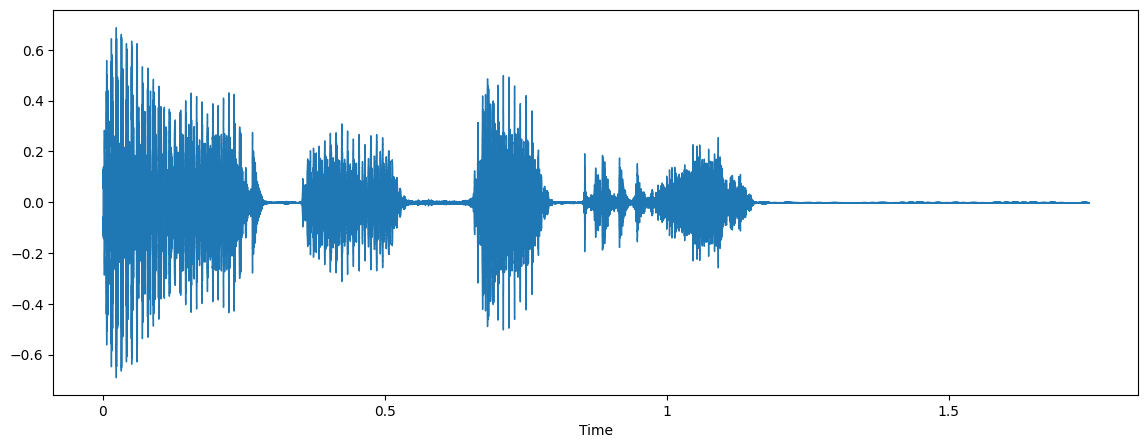

In [12]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [13]:
sample_rate

22050

In [14]:
import pandas as pd

metadata=pd.read_csv('/content/drive/MyDrive/DATA/AUDIO.csv')
metadata.head(10)

,file_path,label
0,/content/drive/MyDrive/DATA/AUDIO/ACTIVATE_LAN...,ACTIVATE_LANE_ASSIST
1,/content/drive/MyDrive/DATA/AUDIO/ACTIVATE_LAN...,ACTIVATE_LANE_ASSIST
2,/content/drive/MyDrive/DATA/AUDIO/ACTIVATE_LAN...,ACTIVATE_LANE_ASSIST
3,/content/drive/MyDrive/DATA/AUDIO/ACTIVATE_LAN...,ACTIVATE_LANE_ASSIST
4,/content/drive/MyDrive/DATA/AUDIO/ACTIVATE_LAN...,ACTIVATE_LANE_ASSIST
5,/content/drive/MyDrive/DATA/AUDIO/ACTIVATE_LAN...,ACTIVATE_LANE_ASSIST
6,/content/drive/MyDrive/DATA/AUDIO/ACTIVATE_LAN...,ACTIVATE_LANE_ASSIST
7,/content/drive/MyDrive/DATA/AUDIO/ACTIVATE_LAN...,ACTIVATE_LANE_ASSIST
8,/content/drive/MyDrive/DATA/AUDIO/ACTIVATE_LAN...,ACTIVATE_LANE_ASSIST
9,/content/drive/MyDrive/DATA/AUDIO/ACTIVATE_LAN...,ACTIVATE_LANE_ASSIST


In [15]:
### Check whether the dataset is imbalanced
metadata['label'].value_counts()

ACTIVATE_LANE_ASSIST    1014
DISABLE_LANE_ASSIST     1000
LIGHT_OFF               1000
LIGHT_ON                1000
POWER_OFF_FOCUS         1000
POWER_ON_FOCUS          1000
TURN_Off_VENTILATION    1000
TURN_ON_VENTILATION     1000
Name: label, dtype: int64

In [16]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='/content/drive/MyDrive/DATA/AUDIO/ACTIVATE_LANE_ASSIST/ACTIVATE LANE ASSIST 1.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [17]:
print(librosa_audio_data)

[-3.9198929e-01 -5.3670299e-01 -3.7663388e-01 ...  3.1145009e-05
  2.3640645e-05 -2.4563869e-06]


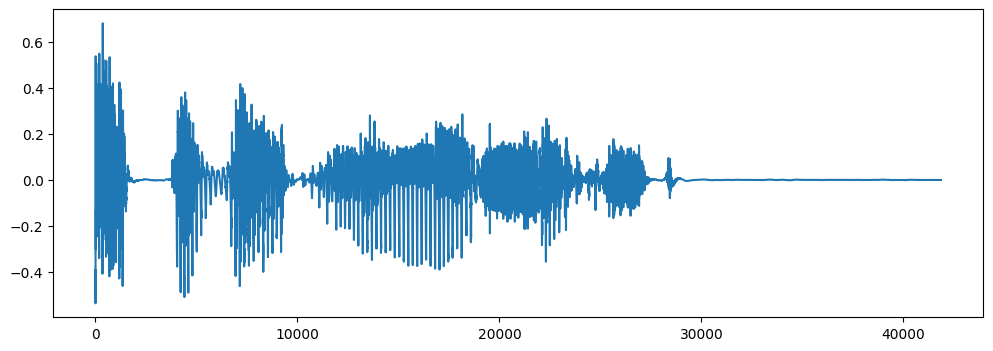

In [18]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [19]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [20]:
wave_audio

array([-17344, -17093, -16251, ...,      0,      0,      0], dtype=int16)

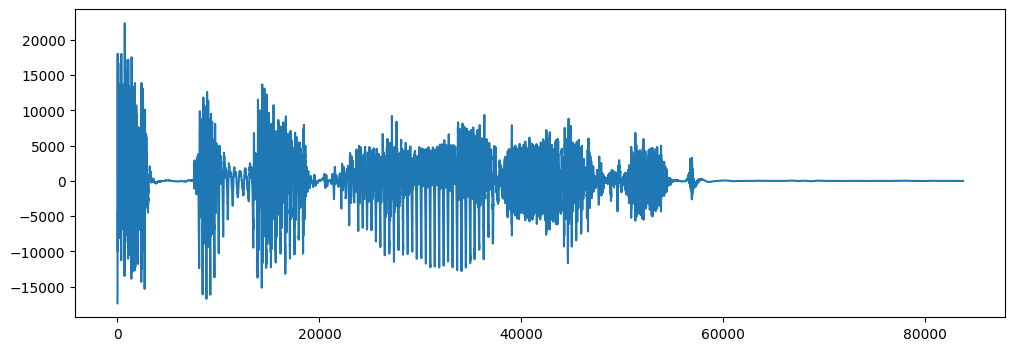

In [21]:
import matplotlib.pyplot as plt

# Original audio with 2 channels
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [22]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 82)


In [23]:
mfccs

array([[ -65.29256  ,  -69.67121  , -110.983986 , ..., -605.54877  ,
        -609.62213  , -614.15424  ],
       [ 125.420044 ,  157.56274  ,  199.54465  , ...,   12.141409 ,
           6.402034 ,    0.       ],
       [ -45.970093 ,  -61.740013 ,  -72.33736  , ...,   12.056047 ,
           6.3799696,    0.       ],
       ...,
       [  -1.0518827,   -1.8530815,   -4.7653613, ...,    1.2231228,
           1.6078727,    0.       ],
       [  -2.224339 ,   -5.1137433,   -8.517256 , ...,    1.2299504,
           1.5261045,    0.       ],
       [  -3.20251  ,   -4.255716 ,   -1.9882376, ...,    1.24675  ,
           1.4516431,    0.       ]], dtype=float32)

In [26]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='/content/drive/MyDrive/DATA/AUDIO/'
metadata=pd.read_csv('/content/drive/MyDrive/DATA/AUDIO.csv')
metadata.head()

,file_path,label
0,/content/drive/MyDrive/DATA/AUDIO/ACTIVATE_LAN...,ACTIVATE_LANE_ASSIST
1,/content/drive/MyDrive/DATA/AUDIO/ACTIVATE_LAN...,ACTIVATE_LANE_ASSIST
2,/content/drive/MyDrive/DATA/AUDIO/ACTIVATE_LAN...,ACTIVATE_LANE_ASSIST
3,/content/drive/MyDrive/DATA/AUDIO/ACTIVATE_LAN...,ACTIVATE_LANE_ASSIST
4,/content/drive/MyDrive/DATA/AUDIO/ACTIVATE_LAN...,ACTIVATE_LANE_ASSIST


In [27]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [30]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["file_path"]))
    final_class_labels=row["label"]
    data=features_extractor(file_path)
    extracted_features.append([data,final_class_labels])

0it [00:00, ?it/s]


ModuleNotFoundError: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 32, in <module>

----> resampy = lazy.load("resampy")

In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()